# Understanding Variational Autoencoders (VAEs)

## What is a Variational Autoencoder (VAE)?
A **Variational Autoencoder (VAE)** is a type of generative model that learns to encode data (e.g., images) into a compressed latent space and then decode this latent space back into data that resembles the original input. Unlike traditional autoencoders, VAEs add a probabilistic twist to encoding, making them more suitable for generating new data that follows the learned distribution.

## Key Terminology and Concepts

### 1. **Encoder**
The part of the VAE that compresses input data into a latent representation. It outputs a **mean vector** and a **log variance vector** for each input, which represent the distribution of the latent variables.

### 2. **Latent Space**
A lower-dimensional space where the encoded data resides. This space helps capture important features of the input data.

### 3. **Reparameterization Trick**
A method that allows backpropagation through the stochastic sampling process by expressing the sampled latent variable as:
\$nz = \mu + \epsilon \cdot \sigma
\$nwhere \( \epsilon \) is random noise, and \( \mu \) and \( \sigma \) are the mean and standard deviation vectors from the encoder.

### 4. **Decoder**
The part of the VAE that reconstructs the data from the sampled latent space representation. It takes the latent vector \( z \) and outputs an image or data similar to the original input.

### 5. **Loss Function**
The VAE loss function is composed of:
- **Reconstruction Loss**: Measures how well the output matches the input.
- **KL Divergence**: A regularization term that ensures the distribution of the latent space is close to a standard normal distribution.

## How VAEs Differ from Regular Autoencoders
- **Probabilistic Nature**: VAEs encode inputs into a probability distribution (mean and variance), while regular autoencoders encode inputs to a fixed vector.
- **Sampling**: VAEs use the reparameterization trick to sample from the distribution during training, making them suitable for generating new data, unlike regular autoencoders that directly encode and decode fixed representations.

## Conceptual Diagram of a VAE

### 1. **Regular Autoencoder**
Imagine a diagram with an input image (e.g., a digit or clothing item) on the left. This image is passed through an **encoder** that compresses it into a simple **latent vector** (a single point in a reduced-dimensional space). This latent vector is then passed to the **decoder**, which reconstructs the input image.

**Visualization**:
- **Input → Encoder → Latent Vector (fixed point) → Decoder → Output (reconstructed image)**

**Example Visual Aid**:
- Think of a funnel where the image goes in and compresses to a point in the center (latent space). The point then expands back into an image as it goes through the decoder.

### 2. **Variational Autoencoder (VAE)**
A VAE is different in that instead of compressing the image to a single fixed point, it encodes the image to a **distribution** represented by a mean (\(\mu\)) and a log variance (\(\log(\sigma^2)\)).

**Visualization**:
- **Input → Encoder → Latent Space (distribution with \(\mu\) and \(\sigma\)) → Sampling → Decoder → Output (reconstructed image)**

**Example Visual Aid**:
- Imagine the funnel again, but this time, instead of a single point, it produces a **cloud of points** (a distribution). A new point is sampled from this distribution and passed through the decoder to reconstruct the image.
- This ensures the model can generate new images by sampling different points from the learned distribution.

## Key Steps Illustrated

### 1. **Encoder Process**
Visualize a grid of images being passed through the encoder. The output is not just one compressed point but a set of mean and variance values for each image, which represents the encoded distribution.

**Example Image**:
- An image of a shoe is shown next to two arrows pointing to two vectors: one labeled \(\mu\) (mean) and the other \(\sigma\) (standard deviation).

### 2. **Latent Space Sampling (Reparameterization Trick)**
This part is crucial for VAEs. Instead of directly passing \(\mu\) and \(\sigma\) to the decoder, the model samples a latent vector \( z \) using:
\[
z = \mu + \epsilon \cdot \sigma
\]

**Example Visual Aid**:
- Show a distribution graph (e.g., a bell curve). Indicate \(\mu\) as the center of the distribution and \(\sigma\) as the spread. Highlight the process of randomly sampling \( z \) from this distribution.

### 3. **Decoder Process**
The decoder takes the sampled \( z \) and reconstructs the input image. This part works similarly to regular autoencoders but starts from a point sampled from a learned distribution.

**Example Image**:
- A point from the latent space (a dot in a 2D scatter plot) is passed to the decoder, which outputs an image that resembles the input.

## Comparison Between Autoencoder and VAE

### **Autoencoder**
- Compresses input to a **fixed point** in latent space.
- Decoder reconstructs directly from this point.
- Less suitable for generating new, varied outputs.

### **VAE**
- Encodes input as a **distribution** (mean and variance).
- Uses sampling to pass points from the distribution to the decoder.
- Suitable for generating new data that follows the same distribution as the input data.

**Example Visual Comparison**:
- For a regular autoencoder, show a single dot representing each image in the latent space.
- For a VAE, show each image being represented as an area or cloud in the latent space (to show the distribution).

## Illustrated Loss Function Explanation

### 1. **Reconstruction Loss**
Measures how close the reconstructed output is to the original input. Imagine showing a side-by-side comparison of the input and reconstructed output.

### 2. **KL Divergence**
Ensures the learned distribution (mean and variance) is close to a standard normal distribution.
- Show two distribution graphs: one representing the learned distribution and one representing the standard normal distribution. The goal is to make them overlap as much as possible.

## Putting It All Together

### Visual Representation:
1. **Input Image** → **Encoder** → \( \mu \) and \( \log(\sigma^2) \)
2. **Sampling** from the latent distribution: \( z = \mu + \epsilon \cdot \sigma \)
3. **Decoder** takes \( z \) and outputs a reconstructed image.

**Final Visual Aid**:
- Show the input and reconstructed image side-by-side.
- Show the latent space as a cloud of points, emphasizing that sampling from this space can generate new images.

This overview and visualization should help you understand how a VAE functions and how it differs from a regular autoencoder.


# Understanding KL Divergence in Variational Autoencoders (VAEs)

## What is KL Divergence?
**Kullback-Leibler (KL) Divergence** is a measure of how one probability distribution differs from a second, reference probability distribution. It quantifies the amount of information lost when approximating one distribution with another.

### Mathematical Definition
For discrete distributions:
\[
D_{KL}(P \| Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)}
\]

For continuous distributions:
\[
D_{KL}(P \| Q) = \int P(x) \log \frac{P(x)}{Q(x)} \, dx
\]

### Key Points to Understand
- **Asymmetry**: KL divergence is not symmetric, meaning \( D_{KL}(P \| Q) \neq D_{KL}(Q \| P) \). It measures how \( Q \) is different from \( P \) but not the other way around.
- **Non-Negative**: KL divergence is always greater than or equal to zero. It is zero when \( P(x) \) and \( Q(x) \) are identical distributions.
- **Interpretation**: It represents the extra information (in bits) needed to encode samples from \( P(x) \) using a code based on \( Q(x) \).

## Why is KL Divergence Needed in VAEs?

### 1. **Regularization of the Latent Space**
- **Objective**: When training a VAE, we want the latent space (where the encoder maps input data) to be well-structured and continuous. This ensures the decoder can generate meaningful outputs even when sampling points that were not present in the training data.
- **KL Divergence** helps by pushing the distribution \( Q(z|x) \) — the encoder's output (i.e., the approximated distribution for the latent space) — to be close to a known, simple prior distribution \( P(z) \) (usually a standard normal distribution \( N(0, I) \)).

### 2. **Ensuring a Smooth and Organized Latent Space**
- **Latent Space**: VAEs use KL divergence to ensure the encoder produces latent vectors that follow a standard Gaussian distribution. This constraint makes the latent space more structured, allowing the decoder to generate coherent samples even when points are sampled from parts of the latent space not directly seen during training.
- Without KL divergence, the encoder might map inputs arbitrarily, making it difficult for the decoder to generate new data that follows the learned distribution.

## How KL Divergence Works in a VAE Loss Function

The **loss function** for training a VAE is composed of two main components:
1. **Reconstruction Loss (e.g., Mean Squared Error or Binary Cross-Entropy)**: Measures how accurately the decoded output matches the input.
2. **KL Divergence**: Regularizes the encoder by ensuring the latent space \( Q(z|x) \) is close to the prior \( P(z) \).

### VAE Loss Function:
\[
\text{VAE Loss} = \text{Reconstruction Loss} + D_{KL}(Q(z|x) \| P(z))
\]

- The **reconstruction loss** ensures the VAE can accurately reconstruct input data.
- The **KL divergence** ensures that the distribution of latent vectors remains close to the prior distribution \( P(z) \), preventing overfitting and making the latent space smooth and organized.

## Intuition Behind KL Divergence in VAEs

### Without KL Divergence:
- The encoder might learn to map each input image to very specific locations in the latent space, potentially ignoring other parts of the space. This would make it hard to sample from the latent space and generate new, realistic outputs.

### With KL Divergence:
- The encoder is encouraged to spread latent representations in such a way that they follow a standard normal distribution. This ensures that points sampled from the latent space during generation are meaningful and produce realistic outputs when decoded.

## Visualizing KL Divergence
Imagine \( P(x) \) as the true distribution (e.g., a Gaussian centered at zero) and \( Q(x) \) as the distribution learned by the VAE's encoder. KL divergence measures how much \( Q(x) \) deviates from \( P(x) \).

### Example:
- If \( Q(z|x) \) outputs a latent space distribution that is not centered around zero or has a larger spread than the standard normal \( P(z) \), the KL divergence value will increase. This will penalize the model by increasing the loss and nudging the model to reshape the latent space closer to \( N(0, I) \).

## Why is KL Divergence Important?
- **Prevents Overfitting**: Regularizes the model, preventing it from memorizing specific training data points.
- **Generative Capability**: Helps VAEs generate new, coherent outputs by sampling from a structured latent space.
- **Smoothness**: Ensures that small changes in the latent vector lead to smooth changes in the generated output, making the space interpretable.

## Summary
KL divergence in VAEs acts as a guide to keep the learned latent space distribution close to a simple, predefined prior (typically \( N(0, I) \)). This allows the VAE to generate new data points that resemble the training data, ensuring that the model doesn’t overfit and that the latent space is organized and interpretable.


# Why Choose the Prior as a Standard Normal Distribution in VAEs?

## Overview
In Variational Autoencoders (VAEs), the **prior** distribution \( P(z) \) represents the assumed distribution for the latent variables \( z \) in the latent space. A common choice for this prior is a **standard normal distribution**:
\[
P(z) = \mathcal{N}(0, I)
\]
where \( \mathcal{N}(0, I) \) denotes a multivariate Gaussian distribution with a mean of 0 and an identity covariance matrix (standard deviation of 1 for each dimension).

## Reasons for Choosing a Standard Normal Distribution

### 1. **Mathematical Simplicity**
- A standard normal distribution \( \mathcal{N}(0, I) \) is easy to sample from and compute with.
- The properties of Gaussian distributions make them convenient for calculating KL divergence, which is used in the VAE loss function to measure the distance between the encoder's output \( Q(z|x) \) and the prior \( P(z) \).

### 2. **Stable and Well-Defined Latent Space**
- A standard normal prior ensures that the latent space is centered around zero and that the latent variables are uncorrelated.
- This structure promotes a well-organized and continuous latent space where small changes in the latent vector lead to gradual changes in the generated outputs.

### 3. **Generative Capability**
- By aligning the encoder's output distribution \( Q(z|x) \) with \( \mathcal{N}(0, I) \), the VAE learns to map input data into a latent space that closely follows this distribution.
- This means that during generation, sampling directly from \( \mathcal{N}(0, I) \) will yield latent vectors that the decoder can process effectively to produce realistic and coherent outputs.

### 4. **Regularization and Generalization**
- The KL divergence term in the VAE loss function pushes the encoder's output to match the standard normal prior. This regularization helps prevent the model from overfitting to the training data by forcing the latent space to be smooth and continuous.
- A structured latent space ensures that similar inputs are mapped to nearby points, allowing for smooth interpolation and better generalization to unseen data.

## Could We Choose a Different Prior?
Yes, other priors can be used depending on the application, but each comes with trade-offs:

- **More Complex Priors**: Choosing a more complex prior (e.g., multimodal distributions) can model more intricate latent space structures but may require more sophisticated training techniques and increase computational complexity.
- **Non-Gaussian Priors**: While possible, non-Gaussian priors may complicate the training process and the calculation of the KL divergence term.

## Why Standard Normal is Preferred:
- **Simplicity and Efficiency**: The standard normal distribution is simple to implement, computationally efficient, and works well in most generative tasks.
- **Good Trade-off**: It balances ease of implementation with effective regularization, making it a practical and effective choice for most VAE applications.

## Conclusion
Choosing a standard normal distribution as the prior in VAEs ensures that the latent space is well-behaved, easy to sample from, and effective for generating new data. While other priors are possible, the simplicity, stability, and generative properties of a standard normal distribution make it the preferred choice in many VAE implementations.


In [3]:
# import libraries
# torch and torch.nn: Core PyTorch libraries for building neural networks.
# torch.optim: Contains optimization algorithms for training.
# torchvision: Provides tools for loading and transforming datasets like Fashion MNIST.
# matplotlib.pyplot: Used for visualizing images and results.

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt 

/Users/Senjuti/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Load the fashion MNIST dataset

### More info about tensor 

A tensor is a generalization of scalars, vectors, and matrices to higher dimensions. It is a fundamental data structure used in many machine learning frameworks, including PyTorch and TensorFlow. Tensors are essential for representing and processing data in deep learning models.
Explanation of Tensors by Dimensionality:

    Scalar (0D Tensor):
        A single number, like 55 or 3.143.14.
        Example: x=5x=5

    Vector (1D Tensor):
        A 1-dimensional array of numbers.
        Example: [1,2,3,4][1,2,3,4] is a 1D tensor with 4 elements.

    Matrix (2D Tensor):
        A 2-dimensional array of numbers with rows and columns.
        Example:
        [123456]
        [14​25​36​] This is a 2D tensor with 2 rows and 3 columns.

    3D Tensor:
        A 3-dimensional array of numbers, like a stack of matrices.
        Example: Think of an RGB image where each color channel (Red, Green, Blue) is a 2D matrix, forming a 3D tensor when stacked.

    nD Tensor:
        A higher-dimensional data structure, where nn can be any number.
        Examples include tensors representing batches of images (4D) or more complex data structures in deep learning.

In [4]:

# Explanation 
# transforms.ToTensor(): Converts the input images from the dataset into PyTorch tensors.
# datasets.FashionMNIST: Downloads and loads the Fashion MNIST dataset containing 28x28 grayscale images.
# DataLoader: Loads the dataset in batches (batch size of 64) for efficient training. This helps the CPU process data in manageable chunks.
# transform = transforms.ToTensor()



# transform to convert images to tensors 
transform = transforms.ToTensor()

# load the training dataset 
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Why Choose a Batch Size of 64?
# Reasonable Size for CPU: This batch size is large enough to ensure efficient training but small enough to avoid overwhelming the CPU's memory.
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Define the Encoder : Explaining Encoder
### The encoder compresses the input image into a latent representation consisting of a mean vector and a log variance vectors for the latent space. These vectors represent the learned distribution of latent variables.

### Why Two Outputs?: The mean and log variance vectors are essential for defining the latent space distribution. They are used to sample latent variables through the reparameterization trick, allowing the model to generate data during training and inference.





In [5]:
# explanation 

# 28*28 (784): The input size matches the flattened size of Fashion MNIST images (28x28 pixels).
# 400 units in fc1: A middle ground for the hidden layer, capturing sufficient details without being too large for a CPU.
# 20 units in fc_mu and fc_logvar: The latent space size determines the dimensionality of the learned distribution.


class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        # A fully connected layer (linear transformation) with 784 input features (the flattened 28x28 image) and 400 output features.
        # Transforms the high-dimensional input data into a lower-dimensional hidden representation with 400 features. This step helps extract key features from the input image.
        self.fc1 = nn.Linear(28*28, 400) # Input: 784 (28*28), Output: 400
        # A linear layer that takes the 400-dimensional hidden representation and outputs a 20-dimensional vector representing the mean (μμ) of the latent space distribution.
        # Computes the mean vector, which indicates the center of the learned latent distribution for a given input.
        self.fc_mu = nn.Linear(400, 20) # Output: 20 (latent mean)
        # A linear layer that outputs a 20-dimensional vector representing the log variance (log⁡(σ2)log(σ2)) of the latent space distribution.
        # Computes the log variance vector, which helps in determining the spread (standard deviation) of the distribution. Using the log variance instead of the variance directly ensures numerical stability during training.
        self.fc_logvar = nn.Linear(400, 20) # Output: 20 (latent log variance)

    
    # Defines the forward pass of the encoder, which processes input data and returns the outputs (mean and log variance).
    
    def forward(self, x):
        # Flattens the 28x28 input image into a 784-dimensional vector, starting from the first dimension (i.e., preserving the batch dimension). This step ensures that the input is a 1D vector that can be fed into the fully connected layer.
        x = torch.flatten(x, start_dim=1) # Flatten the 28x28 image into a 784-dimensional vector
        # Applies the first fully connected layer to the flattened input.
        # torch.relu(): Applies the ReLU activation function to introduce non-linearity and help the model learn complex patterns.
        h1 = torch.relu(self.fc1(x)) # Apply ReLU activation to the hidden layer
        return self.fc_mu(h1), self.fc_logvar(h1) # Output the mean and log variance vectors




        

# Define the Decoder : Explaining Decoder
#### The decoder reconstructs the image from a sampled latent vector.

In [6]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(20, 400)
        self.fc2 = nn.Linear(400, 28*28)

    def forward (self, z):
        # Applies the first fully connected layer followed by a ReLU activation function.
        # Purpose of ReLU: Introduces non-linearity to help the model learn complex relationships and activate only positive values, preventing vanishing gradients and enabling efficient training.
        h1 = torch.relu(self.fc1(z))
        # Applies the second fully connected layer followed by a Sigmoid activation function.
        # Purpose of Sigmoid: Squashes the output to a range between 0 and 1, matching the range of pixel values in the input image.

        return torch.sigmoid(self.fc2(h1)).view

       

Why Use ReLU for the Hidden Layer?

    ReLU (Rectified Linear Unit):
        Mathematical Form: ReLU(x)=max⁡(0,x)ReLU(x)=max(0,x)
        Purpose: ReLU is used in the hidden layer to introduce non-linearity and enable the model to learn complex features. It activates only when the input is positive, which helps prevent the vanishing gradient problem and makes training faster and more efficient.

Why Use Sigmoid for the Output Layer?

    Sigmoid Activation:
        Mathematical Form: Sigmoid(x)=11+e−xSigmoid(x)=1+e−x1​
        Purpose: The Sigmoid function squashes the output values to a range between 0 and 1. This is important for image reconstruction because pixel values in normalized image data typically fall between 0 and 1.
        Why Not ReLU for the Output?:
            Output Constraints: ReLU outputs values ≥0≥0 with no upper bound, which means it is not suitable for scaling outputs within the normalized pixel value range (0 to 1).
            Image Reconstruction: Using ReLU in the output layer could result in pixel values greater than 1, which does not match typical image data requirements.
    Why Not Use Sigmoid for the Hidden Layer?:
        Gradient Saturation: Sigmoid can lead to vanishing gradients when used in hidden layers due to its behavior when values are very high or low, resulting in small gradients. This slows down or hampers learning.
        Efficiency: ReLU is computationally simpler and generally leads to faster training with better performance in hidden layers.

Summary:

    ReLU in Hidden Layers:
        Used for its non-linearity and ability to keep the model computationally efficient.
        Prevents vanishing gradient issues and helps the model learn better by activating only positive values.

    Sigmoid in the Output Layer:
        Ensures the output values are bounded between 0 and 1, matching the format of image pixel values.
        Makes sense for tasks where the output needs to be normalized, such as reconstructing image data.

The combination of ReLU for hidden layers and Sigmoid for the output layer helps the model learn effectively during training and ensures appropriate scaling for the output during inference.

# Combine the encoder and decoder VAE

### The VAE model consists of both the encoder and decoder, with a reparameterization trick for training.

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=400, latent_dim=20):
        super(VAE, self).__init__()
        
        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)  # Layer to generate mu (mean)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)  # Layer to generate logvar (log variance)

        # Decoder
        self.fc2 = nn.Linear(latent_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, input_dim)
        
    def encode(self, x):
        """
        Encodes the input into a latent space, producing mu and logvar.
        """
        h1 = F.relu(self.fc1(x))  # Pass through the first layer with ReLU activation
        mu = self.fc_mu(h1)  # Generate mean
        logvar = self.fc_logvar(h1)  # Generate log variance
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        """
        Reparameterization trick to sample from N(mu, var) using N(0,1).
        """
        std = torch.exp(0.5 * logvar)  # Standard deviation
        eps = torch.randn_like(std)  # Sample from a standard normal distribution
        return mu + eps * std  # Return sampled z
    
    def decode(self, z):
        """
        Decodes the sampled latent vector back to the input space.
        """
        h2 = F.relu(self.fc2(z))  # Pass through the first decoder layer with ReLU
        return torch.sigmoid(self.fc3(h2))  # Final output with sigmoid activation
    
    def forward(self, x):
        """
        Defines the computation for the VAE: encoding, reparameterization, and decoding.
        """
        mu, logvar = self.encode(x)  # Encode the input to mu and logvar
        z = self.reparameterize(mu, logvar)  # Sample latent vector z using reparameterization trick
        recon_x = self.decode(z)  # Decode z to reconstruct x
        return recon_x, mu, logvar  # Return reconstruction, mu, and logvar


# Define the loss function
# The loss function includes both a reconstruction loss and KL divergence.

In [8]:
# recon_x: The reconstructed output generated by the decoder.
# x: The original input image.
# mu: The mean vector output from the encoder for the latent space.
# logvar: The log variance vector output from the encoder for the latent space.

def loss_function(recon_x, x, mu, logvar):
    # nn.functional.binary_cross_entropy(): Computes the Binary Cross-Entropy (BCE) loss between the reconstructed output (recon_x) and the original input (x).
    #Purpose: Measures how similar the reconstructed image is to the original input. The closer recon_x is to x, the lower this loss.
    #reduction='sum': Specifies that the output should be summed across all elements. This ensures that the total reconstruction loss is calculated for the entire batch.
    # Why BCE: BCE is used because pixel values in normalized image data typically range between 0 and 1. The Sigmoid activation in the decoder ensures outputs are also between 0 and 1, matching the input format.
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')  # Reconstruction loss
    #  KL Divergence: This term measures how much the learned latent space distribution Q(z∣x)Q(z∣x) deviates from the standard normal prior P(z)=N(0,I)P(z)=N(0,I). It regularizes the encoder to keep the latent space close to a standard normal distribution.
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())  # KL divergence
    #The combined loss encourages the model to reconstruct the input accurately (low BCE) while maintaining a latent space that follows a standard normal distribution (low KLD).
    return BCE + KLD


# Train the VAE

In [9]:
#Instantiates the VAE model by creating an object of the VAE class. This model has an encoder and decoder defined previously, ready to be trained.
model = VAE()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the selected device
#Chooses the Adam optimization algorithm, which is well-suited for deep learning tasks as it adapts the learning rate for each parameter, improving convergence.
# model.parameters(): Provides the optimizer with all the parameters of the model that need to be updated during training.
# lr=1e-3: Sets the learning rate for the optimizer. A learning rate of 1e-3 is common and often a good starting point for training models.
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
#Loops through the training process for a specified number of epochs. 
# An epoch is one complete pass over the entire training dataset.
num_epochs = 100  # Define the number of epochs
for  epoch in range(num_epochs):
    model.train()
    #Initializes a variable to keep track of the cumulative loss for the current epoch.
    train_loss = 0 
    #Iterates over the training data in batches provided by train_loader.
    #batch_idx: The index of the current batch.
    #data: The input data batch (e.g., images).
    #_: The labels, which are not needed for unsupervised training in a VAE, so they're ignored.
    for batch_idx, (data, _) in enumerate(train_loader):
        # Move data to the device
        data = data.to(device)
        # Flatten the input data if necessary (e.g., for MNIST)
        data = data.view(data.size(0), -1)
        #Clears the gradients of all optimized parameters. This is essential because gradients accumulate by default in PyTorch, so zeroing them ensures that we only consider gradients for the current batch.
        optimizer.zero_grad()
        #Passes the input batch data through the VAE model, which returns:
        #recon_batch: The reconstructed output from the decoder.
        #mu: The mean vector produced by the encoder.
        #logvar: The log variance vector produced by the encoder.
        recon_batch, mu, logvar = model(data)
        # print("Type of data:", type(data))
        # print("Type of recon_batch:", type(recon_batch))
        #Computes the combined loss (reconstruction loss and KL divergence) using the loss_function.
        loss = loss_function(recon_batch, data, mu, logvar)
        #Computes the gradient of the loss with respect to the model's parameters. 
        #This step is essential for updating the weights during the optimization step.
        loss.backward()
        #Adds the scalar value of the loss for the current batch to the train_loss variable. 
        #loss.item() converts the tensor loss to a Python float for easier accumulation.
        train_loss += loss.item()
        #Updates the model parameters using the computed gradients. 
        #This is where the actual learning happens, as the optimizer adjusts the weights to minimize the loss.
        optimizer.step()

    # Print the average loss per epoch
    # During training, you can compute the average loss by dividing the total loss by the number of samples in the batch or epoch to make it comparable across different epochs or datasets.
    avg_loss = train_loss / len(train_loader.dataset)  # Average loss per data point
    print(f'Epoch {epoch + 1}, Average Loss: {avg_loss:.4f}')






Epoch 1, Average Loss: 275.1593
Epoch 2, Average Loss: 252.0365
Epoch 3, Average Loss: 247.7078
Epoch 4, Average Loss: 245.7550
Epoch 5, Average Loss: 244.6159
Epoch 6, Average Loss: 243.7975
Epoch 7, Average Loss: 243.1506
Epoch 8, Average Loss: 242.7336
Epoch 9, Average Loss: 242.2776
Epoch 10, Average Loss: 241.9610
Epoch 11, Average Loss: 241.6838
Epoch 12, Average Loss: 241.4155
Epoch 13, Average Loss: 241.1794
Epoch 14, Average Loss: 240.9856
Epoch 15, Average Loss: 240.8271
Epoch 16, Average Loss: 240.7013
Epoch 17, Average Loss: 240.5284
Epoch 18, Average Loss: 240.4316
Epoch 19, Average Loss: 240.3428
Epoch 20, Average Loss: 240.1971
Epoch 21, Average Loss: 240.0458
Epoch 22, Average Loss: 239.9841
Epoch 23, Average Loss: 239.9178
Epoch 24, Average Loss: 239.8437
Epoch 25, Average Loss: 239.7451
Epoch 26, Average Loss: 239.6591
Epoch 27, Average Loss: 239.6281
Epoch 28, Average Loss: 239.5421
Epoch 29, Average Loss: 239.4957
Epoch 30, Average Loss: 239.4072
Epoch 31, Average L

# Visualize the Reconstructed Images
### Visualize original and reconstructed images to evaluate model performance.



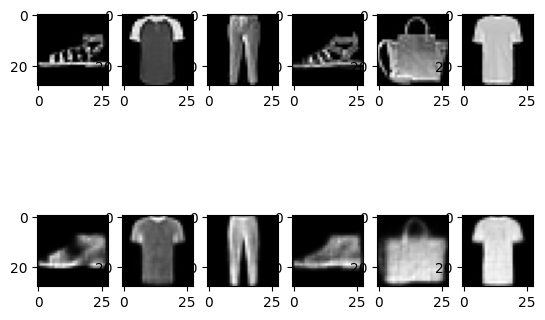

In [10]:
# Visualize a few outputs
# This context manager temporarily sets all requires_grad flags to False.
with torch.no_grad():  # Disable gradient calculation for evaluation
    for i in range(6):
        sample = data[i].unsqueeze(0)  # Select a single image and add batch dimension
        #Passes the sample image through the model (VAE) to obtain the reconstructed version.
        reconstructed, _, _ = model(sample)
        plt.subplot(2, 6, i + 1)
        plt.imshow(sample.view(28, 28), cmap='gray')  # Original image
        plt.subplot(2, 6, i + 7)
        plt.imshow(reconstructed.view(28, 28), cmap='gray')  # Reconstructed image
    plt.show()


# Code for loading test data

In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load the test dataset with the same transform as the training dataset
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Retrieve a batch of test images
test_batch = next(iter(test_loader))
data, _ = test_batch  # We only need the images, not the labels
# Ensure the data is flattened before passing to the model

data = data.view(data.size(0), -1)  # Flatten from [batch_size, 1, 28, 28] to [batch_size, 784]


# Using Test data for visualization

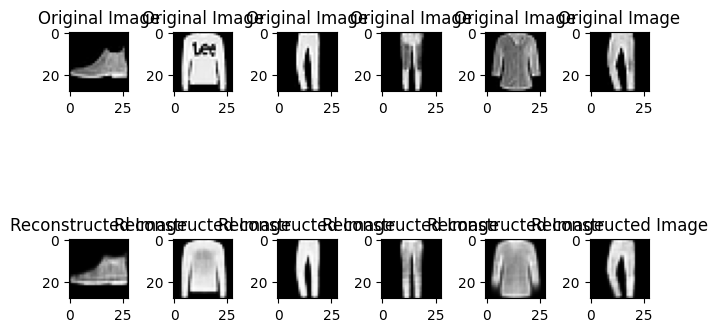

In [12]:
# Visualize a few outputs using test data
with torch.no_grad():  # Disable gradient calculation for evaluation
    for i in range(6):
        sample = data[i].unsqueeze(0)  # Select a single image and add batch dimension
        # Pass the sample image through the model (VAE) to obtain the reconstructed version
        reconstructed, _, _ = model(sample)
        
        # Plot the original image with a label
        plt.subplot(2, 6, i + 1)
        plt.imshow(sample.view(28, 28), cmap='gray')  # Original image
        plt.title('Original Image')
        
        # Plot the reconstructed image with a label
        plt.subplot(2, 6, i + 7)
        plt.imshow(reconstructed.view(28, 28), cmap='gray')  # Reconstructed image
        plt.title('Reconstructed Image')
    
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


# Save the model

In [14]:

# Saves only the state dictionary (parameters) of the model, which is efficient and commonly used.
torch.save(model.state_dict(), 'vae_fashion_mnist.pth')  # Save the trained model
print("Model saved to vae_fashion_mnoist.pth")

Model saved to vae_fashion_mnoist.pth


# Generate Images from Latent Space in VAE

### Generates new images by:

    Sampling random points from a standard normal distribution.
    Decoding each sampled point using the VAE's decoder.
    Displaying the results as grayscale images.

# More concepts 

Reconstruction vs. Generation

    Reconstruction: Involves encoding an input image to the latent space and then decoding it back. This process measures how well the VAE can reproduce input images.
    Generation: Involves sampling directly from the latent space (typically from N(0,1)) without any input. The sampled points are decoded to create entirely new images, not present in the training set.

Latent Space Interpolation

    Interpolation between two points in the latent space allows the VAE to create images that blend features of both points. By choosing two points z1 and z2 in the latent space and interpolating between them, we can smoothly transition between two images.
    Application: Latent space interpolation is widely used in creative applications and image editing, as it allows for smooth transformations between images.

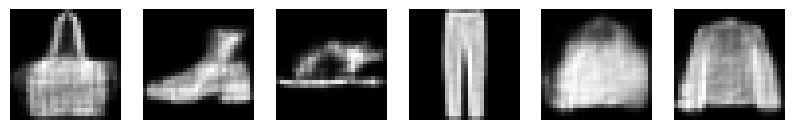

In [17]:
model.eval()  # Set the model to evaluation mode
# Generate new images from random points in latent space 
with torch.no_grad():  # Disable gradient calculation for evaluation
    num_samples = 6  # Number of new samples to generate
    latent_dim = model.fc2.in_features  # Dimension of the latent space (e.g., 20 in our case)

    # sample random points from a standarad normal distribution in the latent space
    z = torch.randn(num_samples, latent_dim).to(device) # sample from N(0, 1)

    # decode the sampled latent vectors to generate new images
    generated_images = model.decode(z).cpu() # Move to cpu for visualization

    # Visualize the generated images
    plt.figure(figsize=(10, 2))
    for i in range (num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(generated_images[i].view(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

# Interpolating between latent space points
### Let's visualize how interpolation works in a VAE, let’s write code to interpolate between two points in the latent space and generate a series of images that transition smoothly from one point to the other. Then ;et's interpolate between multiple points 

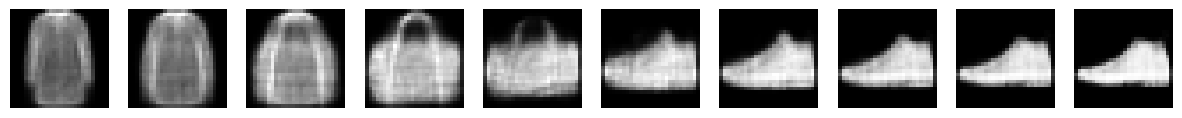

In [29]:
model.eval  # Set the model to evaluation mode
# No of interpolated steps between two points
num_steps = 10
# generate two random points in the latent space
z1 = torch.randn(1, model.fc2.in_features).to(device) # Start point
z2 = torch.randn(1, model.fc2.in_features).to(device) # End point 

# Interpolate between two points z1 and z2
interpolated_images = []
for alpha in torch.linspace(0, 1, num_steps):
    # Linear interpolation: z = (1 - alpha) * z1 + alpha * z2
    #alpha ranges from 0 to 1, creating a smooth path in the latent space.
    z = alpha * z1 + (1 - alpha) * z2
    with torch.no_grad():
        generated_image = model.decode(z).cpu()
    interpolated_images.append(generated_image)

# Plot the interpolated images
# the images are displayed in a row, showing a smooth transition from one point to the other.
plt.figure(figsize=(15, 3))
for i, image in enumerate(interpolated_images):
    plt.subplot(1, num_steps, i + 1)
    plt.imshow(image.view(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
    

### Interpolation using multiple points ( 3 points)

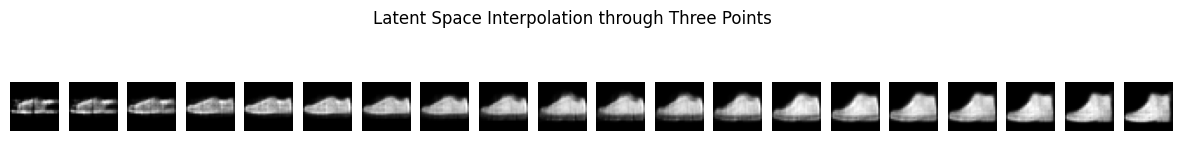

In [31]:
import torch
import matplotlib.pyplot as plt

# Define three random points in the latent space
z1 = torch.randn(1, latent_dim).to(device)
z2 = torch.randn(1, latent_dim).to(device)
z3 = torch.randn(1, latent_dim).to(device)

# Define the number of steps for each transition
num_steps = 10  # Steps from z1 to z2 and z2 to z3

# Initialize list to store images
interpolated_images = []

# Interpolate between z1 and z2
with torch.no_grad():
    for alpha in torch.linspace(0, 1, num_steps):
        z = (1 - alpha) * z1 + alpha * z2  # Linear interpolation between z1 and z2
        generated_image = model.decode(z).cpu().view(28, 28)
        interpolated_images.append(generated_image)

# Interpolate between z2 and z3
with torch.no_grad():
    for alpha in torch.linspace(0, 1, num_steps):
        z = (1 - alpha) * z2 + alpha * z3  # Linear interpolation between z2 and z3
        generated_image = model.decode(z).cpu().view(28, 28)
        interpolated_images.append(generated_image)

# Plot the interpolated images
plt.figure(figsize=(15, 2))
total_steps = len(interpolated_images)
for i, img in enumerate(interpolated_images):
    plt.subplot(1, total_steps, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.suptitle("Latent Space Interpolation through Three Points")
plt.show()


#### Multiple-point interpolation

More Expressive Transitions: By interpolating among multiple points, you can achieve richer and more varied visualizations.
Application: Multi-point interpolation is especially useful for tasks like morphing, smooth transformations, and exploring diverse features learned by the VAE.
Techniques: You can perform linear, weighted, or spherical interpolation to suit different visualization needs.

### Linear vs Non-linear interpolation

1. Why Start with Linear Interpolation?

Linear interpolation is a straightforward way to blend between two points, and it has several advantages:

    Simplicity: Linear interpolation simply creates a straight line between two points. This is easy to compute and understand.
    Control: Linear interpolation provides predictable, evenly spaced transitions between points, which can help with visualizing latent space transformations.
    Efficiency: Linear interpolation is computationally inexpensive, especially in high-dimensional spaces.

For two points z1 and z2 in the latent space, linear interpolation is computed as:
z=(1−α)⋅z1+α⋅z2
z=(1−α)⋅z1+α⋅z2

where α varies between 0 and 1. This creates a series of points along a straight line between z1 and z2.

However, linear interpolation can sometimes produce unnatural transitions if the latent space is highly curved or not well-aligned with a straight line. In these cases, a non-linear interpolation method may yield smoother, more natural transformations.
2. Why Use Non-Linear Interpolation?

In complex, high-dimensional spaces, non-linear interpolation can better reflect the actual structure of the latent space. This is because latent spaces learned by VAEs are often not perfectly flat or Euclidean; they may have curved, spherical, or otherwise non-linear structures. Non-linear interpolation methods respect these shapes, producing more meaningful transitions between points.
Example: Spherical Interpolation (Slerp)

One popular form of non-linear interpolation in VAEs is spherical interpolation (slerp). This approach interpolates along the arc of a hypersphere, rather than a straight line, which can lead to smoother transitions.

    Slerp Formula: For two points z1 and z2 in the latent space:
    slerp(z1,z2,α)=sin⁡((1−α)⋅Ω)sin⁡(Ω)⋅z1+sin⁡(α⋅Ω)sin⁡(Ω)⋅z2
    slerp(z1,z2,α)=sin(Ω)sin((1−α)⋅Ω)​⋅z1+sin(Ω)sin(α⋅Ω)​⋅z2

    where Ω is the angle between z1 and z2, calculated as:
    Ω=arccos⁡(z1⋅z2∥z1∥∥z2∥)
    Ω=arccos(∥z1∥∥z2∥z1⋅z2​)

    Why Slerp? Slerp maintains a constant distance from the origin, creating a smooth path on the surface of the hypersphere that is better aligned with the non-linear nature of many VAEs' latent spaces.

Pros of Non-Linear Interpolation

    More Natural Transitions: Non-linear paths often better capture the true structure of the latent space, especially if it has a curved or spherical distribution.
    Smoothness: Spherical paths tend to produce smoother, more visually consistent transitions between points in the latent space.



##### When to Use Linear vs. Non-Linear Interpolation

| Scenario                                   | Recommended Approach                 | Reason                                                               |
|--------------------------------------------|--------------------------------------|----------------------------------------------------------------------|
| Simple transitions between two points      | Linear Interpolation                 | Simplicity and efficiency                                            |
| High-dimensional, curved latent spaces     | Spherical Interpolation (Slerp)      | Respects latent space curvature, resulting in smoother paths         |
| Interpolating across more than two points  | Weighted Combinations or Slerp Chains | Allows for smoother blending between more than two vectors           |
